<a href="https://colab.research.google.com/github/abubakarzohaib141/LangGraph/blob/main/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q langchain_google_genai langgraph langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00


In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph , START , END
from langgraph.graph.state import CompiledStateGraph
from langchain_core.messages.ai import AIMessage
from typing_extensions import TypedDict
from google.colab import userdata
from IPython.display import Image , display

In [8]:
llm = ChatGoogleGenerativeAI(
    model = "gemini-1.5-flash",
    api_key = userdata.get("GEMINI_API_KEY")
)

In [12]:
ai_msg : AIMessage = llm.invoke("Hi I am Abu Bakar")
print(ai_msg.content)

Hello Abu Bakar, it's nice to meet you!  How can I help you today?



In [10]:
class MessageState(TypedDict) :
  prompt : str
  output : str

In [16]:
def Assistant(state : MessageState) :
  print("--- 🤖 Assistant ---", state)
  prompt = state['prompt']
  ai_msg : AIMessage = llm.invoke(prompt)
  return {"output" : ai_msg.content}

In [18]:
greet_message = Assistant(MessageState(prompt="Hi I am Abu Bakar"))
print(greet_message)

--- 🤖 Assistant --- {'prompt': 'Hi I am Abu Bakar'}
{'output': "Hello Abu Bakar, it's nice to meet you. How can I help you today?\n"}


In [19]:
builder : StateGraph = StateGraph(state_schema=MessageState)

In [20]:
builder.add_node("Assistant", Assistant)

In [21]:
builder.add_edge(START , "Assistant")
builder.add_edge("Assistant", END)

In [22]:
graph : CompiledStateGraph = builder.compile()

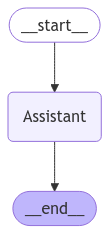

In [23]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
welcome = "Welcome To Your Assistant type 'exit' to exit the chat"
print(welcome)
while True :
 user_input = input("Human : ")
 result = graph.invoke({"prompt" : user_input})
 print(result)

 if user_input == "exit" :
  print("Thank You For Comming!")
  break


Welcome To Your Assistant type 'exit' to exit the chat
Human : Hello
--- 🤖 Assistant --- {'prompt': 'Hello'}
{'prompt': 'Hello', 'output': 'Hello there! How can I help you today?\n'}
Human : what is ai
--- 🤖 Assistant --- {'prompt': 'what is ai'}
{'prompt': 'what is ai', 'output': 'AI, or Artificial Intelligence, is a broad field of computer science dedicated to creating systems capable of performing tasks that typically require human intelligence.  These tasks include things like:\n\n* **Learning:** Acquiring information and rules for using the information.\n* **Reasoning:** Using rules to reach approximate or definite conclusions.\n* **Problem-solving:** Finding solutions to complex situations.\n* **Perception:** Interpreting sensory information like images, sound, and text.\n* **Language understanding:** Processing and understanding human language.\n\nThere are different approaches to AI, including:\n\n* **Narrow or Weak AI:** This is AI designed for a specific task, like playing ch